In [26]:
import os

In [27]:
import cv2

In [28]:
train_cats_path = r'D:\sj\cats\cats_and_dogs_small\train\cats'

In [29]:
train_dogs_path = r'D:\sj\cats\cats_and_dogs_small\train\dogs'

In [30]:
cats = []
label_cats = []

In [31]:
imagelist_cats = os.listdir(train_cats_path)
imagelist_dogs = os.listdir(train_dogs_path)

In [32]:
for imagename in imagelist_cats:
    image = cv2.imread(train_cats_path+'\\'+ imagename)
    image = cv2.resize(image,(64,64),)
    cats.append(image)
    label_cats.append('0')

In [33]:
dogs = []

In [34]:
label_dogs = []

In [35]:
for imagename in imagelist_dogs:
    image = cv2.imread(train_dogs_path+'\\'+ imagename)
    image = cv2.resize(image,(64,64),)
    dogs.append(image)
    label_dogs.append('1')

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
train_images = cats + dogs

In [38]:
train_images = np.array(train_images)

In [39]:
train_images.shape

(2002, 64, 64, 3)

In [40]:
train_labels = label_cats + label_dogs

In [41]:
train_labels = np.array(train_labels)

In [42]:
train_labels.shape

(2002,)

In [43]:
train_images = train_images.reshape(2002,-1)/255

In [44]:
from sklearn import neighbors,linear_model,tree,ensemble,svm,model_selection

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
X = train_images
y = train_labels
rlts = []
labels = []
for model,modelname in [
    [neighbors.KNeighborsClassifier(n_neighbors=5),'KNN n=5'],
    [neighbors.KNeighborsClassifier(n_neighbors=20),'KNN n=20'],
    [linear_model.LogisticRegressionCV(),'line_model'],
    [svm.LinearSVC(),'linearSVC'],
    [svm.SVC(),'SVC'],
    [ensemble.AdaBoostClassifier(),'AdaBoostClassifier']
]:
    print(modelname)
    print(model_selection.cross_val_score(model,X,y))
    rlt = model_selection.cross_val_score(model,X,y)
    rlts.append([xx for xx in rlt])
    labels.append(modelname)
    

KNN n=5
[0.53443114 0.54491018 0.55255255]
KNN n=20
[0.56287425 0.60179641 0.56306306]
line_model
[0.58682635 0.57784431 0.59009009]
linearSVC
[0.56437126 0.56437126 0.55255255]
SVC
[0.58233533 0.58383234 0.58408408]
AdaBoostClassifier
[0.57035928 0.57634731 0.54804805]


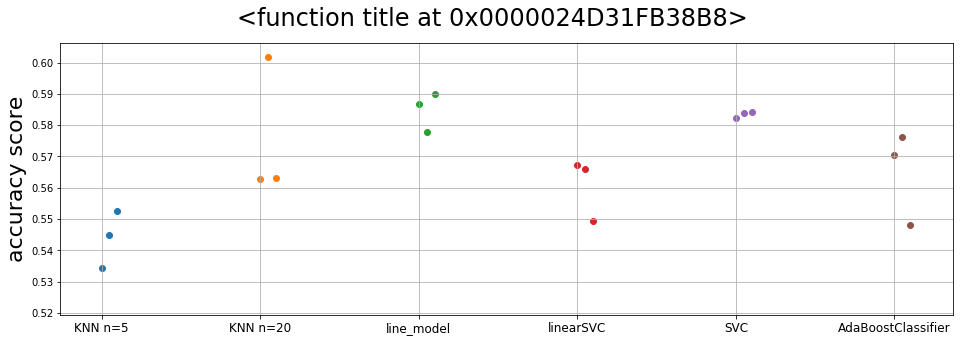

In [46]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)
for i, rlt in enumerate(rlts):
    xs, ys = [i+row*0.05 for row in range(len(rlt))], rlt
    ax.scatter(xs, ys, label = labels[i])
   
ax.set_xticks(range(len(rlts)))
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('accuracy score', fontsize=22)
fig.suptitle(title, fontsize=24)
plt.grid()
plt.show()